In [65]:
# "The Face of a Leader"
# Study 2b: Reverse-correlation rating study on composite images of leader faces
# Evan W. Carr, 05-29-2018 (Columbia Business School)

import pandas as pd
import numpy as np
from plotnine import *
from statsmodels.stats.anova import AnovaRM
from scipy.stats import ttest_rel

import warnings; warnings.simplefilter('ignore')

%matplotlib inline  

# Set working directory to location of data files, and read in .csv's:
rawData = pd.read_csv('study2b_data_05032017.csv')

rawData.head(20)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,ci_wmwf_warmth,antici_bfbm_warmth,antici_bfwf_warmth,antici_wmbm_warmth,antici_wmwf_warmth,age,sex,race,data_use,mTurkCode
0,5/1/2017 13:02,5/1/2017 13:05,0,162.216.46.57,100,199,1,5/1/2017 13:05,R_XiU2KXOTjmRcyKR,NaN,...,4,4,4,4,4,33,1,1,4,2559407349
1,5/1/2017 13:02,5/1/2017 13:09,0,24.3.147.179,100,419,1,5/1/2017 13:09,R_3fHQZtTIQOZ3mAP,NaN,...,3,1,2,1,5,33,1,1,4,2866179603
2,5/1/2017 13:08,5/1/2017 13:09,0,74.213.35.174,100,58,1,5/1/2017 13:09,R_3iRzjqdbtSd66hu,NaN,...,5,5,3,4,4,24,1,1,4,3322584578
3,5/1/2017 13:10,5/1/2017 13:12,0,72.185.235.232,100,104,1,5/1/2017 13:12,R_3Pk32thD4KyHWDi,NaN,...,4,4,2,3,2,29,1,1,4,3210623316
4,5/1/2017 13:43,5/1/2017 13:47,0,177.237.19.21,100,230,1,5/1/2017 13:47,R_2qBQg5vAc7xUuZl,NaN,...,4,3,2,2,5,29,1,3,4,503729829
5,5/1/2017 13:49,5/1/2017 13:54,0,174.232.6.82,100,249,1,5/1/2017 13:54,R_3HUlBDHAatBBU6R,NaN,...,3,4,5,2,6,26,1,1,4,4991967510
6,5/1/2017 14:07,5/1/2017 14:12,0,98.113.174.246,100,270,1,5/1/2017 14:12,R_07EOVIJgM538QWB,NaN,...,3,5,3,4,6,56,2,1,4,1442170656
7,5/1/2017 14:12,5/1/2017 14:14,0,72.90.87.5,100,161,1,5/1/2017 14:14,R_27lELIlL5lbXmfb,NaN,...,2,4,4,3,6,26,1,1,4,5040702783
8,5/1/2017 14:56,5/1/2017 14:57,0,198.72.247.247,100,65,1,5/1/2017 14:57,R_3g14VQm25iwVv0v,NaN,...,5,5,3,5,4,21,2,4,4,9137656712
9,5/1/2017 14:54,5/1/2017 14:58,0,104.35.170.65,100,235,1,5/1/2017 14:58,R_1NeHQurMZU7IISX,NaN,...,4,2,3,3,4,53,2,1,4,5696231946


In [66]:
# Create new clean version of the data frame:
cleanData = (pd
             .concat([rawData.loc[:, ['Finished', 'ResponseId']], 
                      rawData.loc[:, 'ci_bfbm_attractiveness':'data_use']],
                      axis=1)
             .query('(Finished == 1) & (data_use >= 3)')
             .drop(['Finished', 'age', 'sex', 'race', 'data_use'], axis=1))

cleanData = (pd
             .melt(cleanData, 
                   id_vars=['ResponseId'], 
                   var_name='TrialType', 
                   value_name='Choice')
             .sort_values(by=['ResponseId', 'TrialType'])
             .dropna())

cleanData.sample(n=20)

,ResponseId,TrialType,Choice
5021,R_qz0qEKjBvCfTUrL,ci_bfwf_leader,5
4464,R_xb9IrUogu339NDj,antici_bfbm_happiness,3
6976,R_r7QuoL8gzFi59HH,ci_bfwf_race,4
8305,R_2f9EDJFtnSLRgpF,antici_bfbm_trustworthiness,3
4424,R_2zbZrhf6g31eKkk,antici_bfbm_happiness,3
3879,R_27lELIlL5lbXmfb,ci_bfbm_happiness,4
6989,R_2z6XQErT9NUfvWU,ci_bfwf_race,4
6859,R_2qqSPj4Gzd43Tdm,ci_bfbm_race,6
5500,R_cGc0qsbnY1pN47D,antici_bfwf_leader,2
4785,R_29pnqMLUupXzoym,antici_wmwf_happiness,4


In [67]:
# Split TrialType attribute into our actual factors and rating dimensions:
cleanData[['Stimulus', 'BaseImage', 'Dimension']] = cleanData['TrialType'].str.split('_', expand=True)
cleanData['BaseImage'] = cleanData['BaseImage'].str.upper()
cleanData['Dimension'] = cleanData['Dimension'].str.capitalize()

indexDict = {
    'Attractiveness': 'Positivity',
    'Competence': 'Ability',
    'Dominance': 'Ability',
    'Gender': 'Gender',
    'Happiness': 'Positivity',
    'Leader': 'Leader',
    'Likability': 'Positivity',
    'Race': 'Race',
    'Trustworthiness': 'Positivity',
    'Warmth': 'Positivity'
}

cleanData['Index'] = cleanData['Dimension'].map(indexDict)

cleanData_long = cleanData.drop(['TrialType'], axis=1)

cleanData_long.head(20)

,ResponseId,Choice,Stimulus,BaseImage,Dimension,Index
490,R_07EOVIJgM538QWB,4,antici,BFBM,Attractiveness,Positivity
1458,R_07EOVIJgM538QWB,3,antici,BFBM,Competence,Ability
2426,R_07EOVIJgM538QWB,2,antici,BFBM,Dominance,Ability
3394,R_07EOVIJgM538QWB,1,antici,BFBM,Gender,Gender
4362,R_07EOVIJgM538QWB,5,antici,BFBM,Happiness,Positivity
5330,R_07EOVIJgM538QWB,3,antici,BFBM,Leader,Leader
6298,R_07EOVIJgM538QWB,6,antici,BFBM,Likability,Positivity
7266,R_07EOVIJgM538QWB,6,antici,BFBM,Race,Race
8234,R_07EOVIJgM538QWB,4,antici,BFBM,Trustworthiness,Positivity
9202,R_07EOVIJgM538QWB,5,antici,BFBM,Warmth,Positivity


In [68]:
# Get quick demographics summary, without excluded subjects:
demogSummary = (rawData
                .query('(Finished == 1) & (data_use >= 3)')
                .groupby('ResponseId')
                .agg({'age': np.mean, 'sex': pd.Series.unique, 'race': pd.Series.unique})
                .reset_index())

demogSummary['age'].mean()

34.49586776859504

In [69]:
demogSummary['age'].std()

9.740913686561225

In [70]:
# 1 = male, 2 = female
demogSummary['sex'].value_counts()

1    66
2    55
Name: sex, dtype: int64

In [71]:
# 1 = White-American, 2 = African-American, 3 = Hispanic, 4 = Asian-American, 5 = other
demogSummary['race'].value_counts()

1    81
2    17
4    11
3     8
5     4
Name: race, dtype: int64

In [72]:
# Convert dataframe to wide format to calculate subject-level difference scores:
cleanData_wide = (cleanData_long
                  .set_index(['ResponseId', 'Stimulus', 'BaseImage', 'Dimension', 'Index'])
                  .unstack('Stimulus')
                  .reset_index())

def flatten_cols(df):
    df.columns = ['_'.join(tuple(map(str, t))).rstrip('_') for t in df.columns.values]
    return df

cleanData_wide = flatten_cols(cleanData_wide)

cleanData_wide['Choice_meandiff'] = cleanData_wide['Choice_ci'] - cleanData_wide['Choice_antici']

cleanData_wide.head(20)

,ResponseId,BaseImage,Dimension,Index,Choice_antici,Choice_ci,Choice_meandiff
0,R_07EOVIJgM538QWB,BFBM,Attractiveness,Positivity,4,6,2
1,R_07EOVIJgM538QWB,BFBM,Competence,Ability,3,6,3
2,R_07EOVIJgM538QWB,BFBM,Dominance,Ability,2,5,3
3,R_07EOVIJgM538QWB,BFBM,Gender,Gender,1,1,0
4,R_07EOVIJgM538QWB,BFBM,Happiness,Positivity,5,5,0
5,R_07EOVIJgM538QWB,BFBM,Leader,Leader,3,6,3
6,R_07EOVIJgM538QWB,BFBM,Likability,Positivity,6,5,-1
7,R_07EOVIJgM538QWB,BFBM,Race,Race,6,6,0
8,R_07EOVIJgM538QWB,BFBM,Trustworthiness,Positivity,4,5,1
9,R_07EOVIJgM538QWB,BFBM,Warmth,Positivity,5,5,0


In [73]:
# Create summary dataframe for each Dimension, with means, SDs, and SEMs:
dimSummary = flatten_cols(cleanData_wide
                          .groupby(['BaseImage', 'Dimension'])
                          .agg({'Choice_meandiff': [np.mean, np.std, 'count']})
                          .reset_index())

# Need to reverse-code ratings for gender and race dimensions:
dimSummary.loc[dimSummary['Dimension']=='Gender', 'Choice_meandiff_mean'] = -1 * \
    dimSummary.loc[dimSummary['Dimension']=='Gender', 'Choice_meandiff_mean']
dimSummary.loc[dimSummary['Dimension']=='Race', 'Choice_meandiff_mean'] = -1 * \
    dimSummary.loc[dimSummary['Dimension']=='Race', 'Choice_meandiff_mean']

dimSummary['Choice_sem'] = dimSummary['Choice_meandiff_std'] / np.sqrt(dimSummary['Choice_meandiff_count'])
dimSummary['Choice_sem_lower'] = dimSummary['Choice_meandiff_mean'] - dimSummary['Choice_sem']
dimSummary['Choice_sem_upper'] = dimSummary['Choice_meandiff_mean'] + dimSummary['Choice_sem']

dimSummary

,BaseImage,Dimension,Choice_meandiff_mean,Choice_meandiff_std,Choice_meandiff_count,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,BFBM,Attractiveness,1.528926,1.586791,121,0.144254,1.384672,1.673179
1,BFBM,Competence,1.553719,1.580877,121,0.143716,1.410003,1.697435
2,BFBM,Dominance,1.074380,1.742437,121,0.158403,0.915977,1.232784
3,BFBM,Gender,0.487603,1.528156,121,0.138923,0.348680,0.626527
4,BFBM,Happiness,1.297521,1.656526,121,0.150593,1.146927,1.448114
5,BFBM,Leader,1.512397,1.928366,121,0.175306,1.337091,1.687703
6,BFBM,Likability,1.355372,1.590909,121,0.144628,1.210744,1.500000
7,BFBM,Race,-0.090909,1.072381,121,0.097489,-0.188398,0.006580
8,BFBM,Trustworthiness,1.165289,1.649985,121,0.149999,1.015291,1.315288
9,BFBM,Warmth,0.958678,1.685214,121,0.153201,0.805476,1.111879


In [74]:
# Create a similar summary dataframe, but split out by selected (ci) vs. unselected (antici):
plotSummary = flatten_cols(cleanData_long
                          .groupby(['BaseImage', 'Dimension', 'Stimulus'])
                          .agg({'Choice': [np.mean, np.std, 'count']})
                          .reset_index())

# Need to reverse-code ratings for gender and race dimensions:
plotSummary.loc[plotSummary['Dimension']=='Gender', 'Choice_mean'] = 7 - \
    plotSummary.loc[plotSummary['Dimension']=='Gender', 'Choice_mean']
plotSummary.loc[plotSummary['Dimension']=='Race', 'Choice_mean'] = 7 - \
    plotSummary.loc[plotSummary['Dimension']=='Race', 'Choice_mean']

plotSummary['Choice_sem'] = plotSummary['Choice_std'] / np.sqrt(plotSummary['Choice_count'])
plotSummary['Choice_sem_lower'] = plotSummary['Choice_mean'] - plotSummary['Choice_sem']
plotSummary['Choice_sem_upper'] = plotSummary['Choice_mean'] + plotSummary['Choice_sem']

plotSummary.loc[plotSummary['Stimulus']=='ci', 'Stimulus'] = 'Selected'
plotSummary.loc[plotSummary['Stimulus']=='antici', 'Stimulus'] = 'Unselected'

plotSummary

,BaseImage,Dimension,Stimulus,Choice_mean,Choice_std,Choice_count,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,BFBM,Attractiveness,Unselected,2.272727,1.211060,121,0.110096,2.162631,2.382824
1,BFBM,Attractiveness,Selected,3.801653,1.288538,121,0.117140,3.684513,3.918793
2,BFBM,Competence,Unselected,2.859504,1.247035,121,0.113367,2.746137,2.972871
3,BFBM,Competence,Selected,4.413223,1.229291,121,0.111754,4.301469,4.524977
4,BFBM,Dominance,Unselected,3.413223,1.388461,121,0.126224,3.286999,3.539447
5,BFBM,Dominance,Selected,4.487603,1.073279,121,0.097571,4.390032,4.585174
6,BFBM,Gender,Unselected,4.859504,1.362019,121,0.123820,4.735684,4.983324
7,BFBM,Gender,Selected,5.347107,1.202156,121,0.109287,5.237821,5.456394
8,BFBM,Happiness,Unselected,2.512397,1.239057,121,0.112642,2.399755,2.625038
9,BFBM,Happiness,Selected,3.809917,1.206331,121,0.109666,3.700251,3.919584


In [75]:
# Create dictionary to describe the different types of base-images:
baseImgDict = {
    'BFBM': 'AA (gender-ambiguous)',
    'BFWF': 'Female (race-ambiguous)',
    'WMBM': 'Male (race-ambiguous)',
    'WMWF': 'White (gender-ambiguous)'
}

dimSummary['BaseImageDesc'] = dimSummary['BaseImage'].map(baseImgDict)
plotSummary['BaseImageDesc'] = plotSummary['BaseImage'].map(baseImgDict)

In [76]:
# Plot overall ratings and difference scores, by base-image & dimension ...

# Do this in a loop, which subsets the data & creates plots for each base-image:

for i in plotSummary['BaseImage'].unique():
    
    exec("plotSummary_" + i + " = plotSummary.loc[plotSummary.BaseImage==i, :]")
    exec("dimSummary_" + i + " = dimSummary.loc[dimSummary.BaseImage==i, :]")

    # Reorder dimension categories by magnitude of difference between selected/unselected:
    exec("plotSummary_" + i + ".Dimension = plotSummary_" + i + ".Dimension.astype('category')")
    exec("plotCats = dimSummary_" + i + ".sort_values(by='Choice_meandiff_mean', ascending=False).Dimension")
    
    exec("plotSummary_" + i + ".Dimension = plotSummary_" + i + ".Dimension.cat.reorder_categories(plotCats)")
    exec("dimSummary_" + i + ".Dimension = dimSummary_" + i + ".Dimension.astype('category').cat.reorder_categories(plotCats)")

    # Create plots:
    exec("plotBoth_" + i + " = (ggplot(plotSummary_" + i + ", aes(x='Dimension', y='Choice_mean', color='Stimulus')) + geom_pointrange(aes(ymin='Choice_sem_lower', ymax='Choice_sem_upper'), size=.6) + theme_classic() + coord_flip() + scale_y_continuous(breaks=[1,2,3,4,5,6], limits=[1,6]) + labs(color='Image Type', x='Rating Dimension', y='Ratings on Selected and Nonselected Template Images (TIs) +/- 1 SEM') + theme(figure_size = (6,4), text = element_text('Gill Sans MT'), axis_text_x  = element_text(size=10), axis_title_x = element_text(size=10, weight='bold'), axis_text_y = element_text(size=10), axis_title_y = element_text(size=10, weight='bold'), axis_line_x = element_line(color='black'), axis_line_y = element_line(color='black'), legend_position = 'right', legend_title = element_text(weight='bold', size=10), legend_text = element_text(size=10), panel_grid_major_y = element_line(color='gray', size=0.3, linetype='dashed')))")
    exec("plotDiff_"+ i + " = (ggplot(dimSummary_" + i + ", aes(x='Dimension', y='Choice_meandiff_mean')) + geom_pointrange(aes(ymin='Choice_sem_lower', ymax='Choice_sem_upper'), size=.6) + scale_color_manual(values='black') + theme_classic() + labs(x='', y='Difference Score Between Selected and Nonselected Template Images (TIs) +/- 1 SEM') + coord_flip() + theme(figure_size = (4,4), text = element_text('Gill Sans MT'), axis_text_x  = element_text(size=10), axis_title_x = element_text(size=10, weight='bold'), axis_text_y = element_text(size=10), axis_title_y = element_text(size=10, weight='bold'), axis_line_x = element_line(color='black'), axis_line_y = element_line(color='black'), panel_grid_major_y = element_line(color='gray', size=0.3, linetype='dashed')))") 


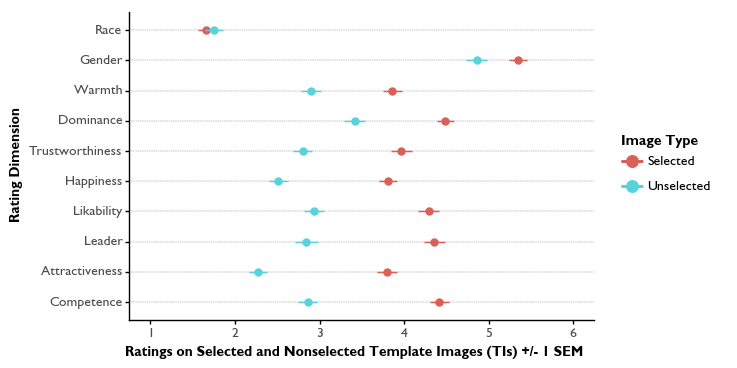

<ggplot: (107834182618)>

In [77]:
# BFBM ratings plot:
plotBoth_BFBM

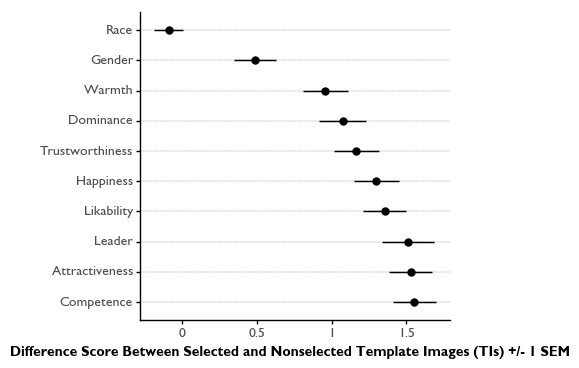

<ggplot: (107834118625)>

In [78]:
# BFBM difference-score plot:
plotDiff_BFBM

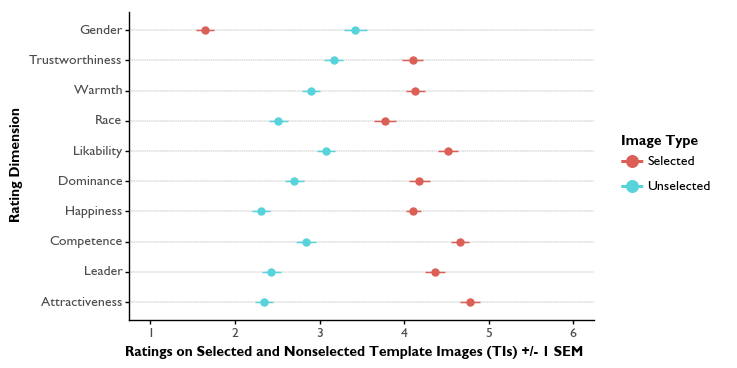

<ggplot: (-9223371929020632814)>

In [79]:
# BFWF ratings plot:
plotBoth_BFWF

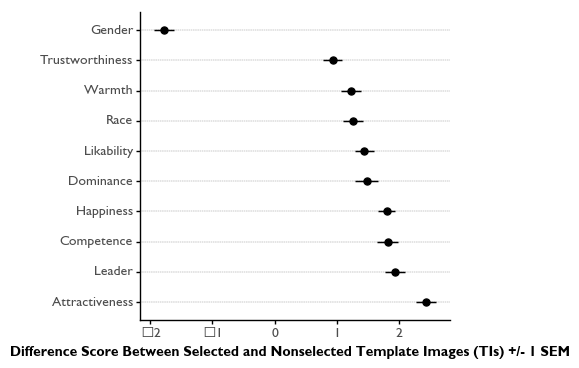

<ggplot: (107830216887)>

In [80]:
# BFWF difference-score plot:
plotDiff_BFWF

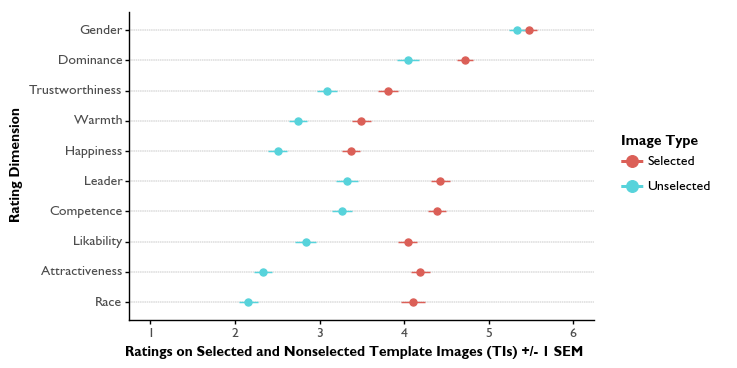

<ggplot: (-9223371929024608575)>

In [81]:
# WMBM ratings plot:
plotBoth_WMBM

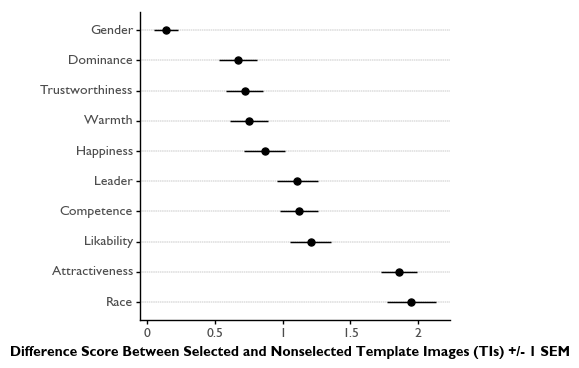

<ggplot: (-9223371929022094697)>

In [82]:
# WMBM difference-score plot:
plotDiff_WMBM

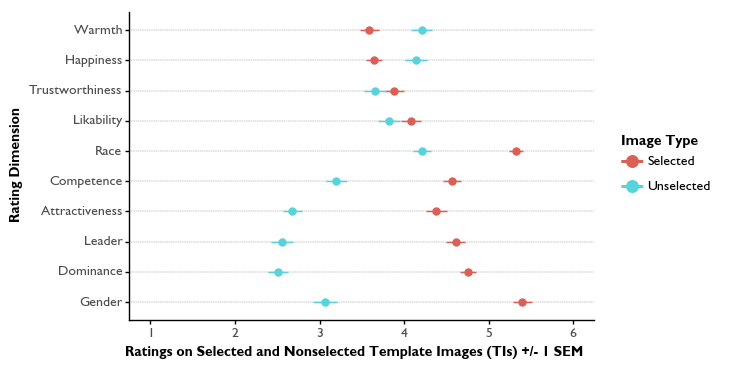

<ggplot: (-9223371929020597269)>

In [83]:
# WMWF ratings plot:
plotBoth_WMWF

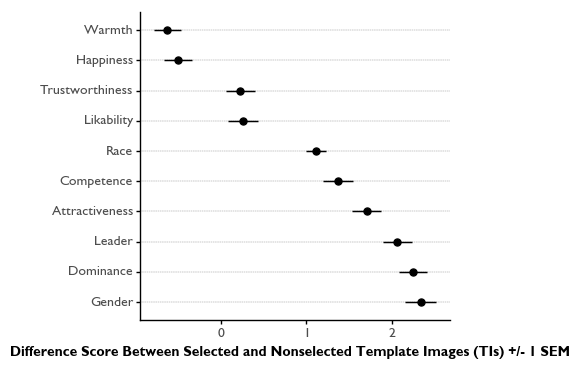

<ggplot: (107834184207)>

In [84]:
# WMWF difference-score plot:
plotDiff_WMWF

In [85]:
# Do another summary analysis for Index:
indexSummary = flatten_cols(cleanData_wide
                            .groupby(['BaseImage', 'Index'])
                            .agg({'Choice_meandiff': [np.mean, np.std, 'count']})
                            .reset_index())

indexSummary['BaseImageDesc'] = indexSummary['BaseImage'].map(baseImgDict)

# Need to reverse-code ratings for gender and race dimensions:
indexSummary.loc[indexSummary['Index']=='Gender', 'Choice_meandiff_mean'] = -1 * \
    indexSummary.loc[indexSummary['Index']=='Gender', 'Choice_meandiff_mean']
indexSummary.loc[indexSummary['Index']=='Race', 'Choice_meandiff_mean'] = -1 * \
    indexSummary.loc[indexSummary['Index']=='Race', 'Choice_meandiff_mean']

indexSummary['Choice_sem'] = indexSummary['Choice_meandiff_std'] / np.sqrt(indexSummary['Choice_meandiff_count'])
indexSummary['Choice_sem_lower'] = indexSummary['Choice_meandiff_mean'] - indexSummary['Choice_sem']
indexSummary['Choice_sem_upper'] = indexSummary['Choice_meandiff_mean'] + indexSummary['Choice_sem']

indexSummary

,BaseImage,Index,Choice_meandiff_mean,Choice_meandiff_std,Choice_meandiff_count,BaseImageDesc,Choice_sem,Choice_sem_lower,Choice_sem_upper
0,BFBM,Ability,1.314050,1.677446,242,AA (gender-ambiguous),0.107830,1.206219,1.421880
1,BFBM,Gender,0.487603,1.528156,121,AA (gender-ambiguous),0.138923,0.348680,0.626527
2,BFBM,Leader,1.512397,1.928366,121,AA (gender-ambiguous),0.175306,1.337091,1.687703
3,BFBM,Positivity,1.261157,1.640110,605,AA (gender-ambiguous),0.066680,1.194477,1.327837
4,BFBM,Race,-0.090909,1.072381,121,AA (gender-ambiguous),0.097489,-0.188398,0.006580
5,BFWF,Ability,1.648760,1.959279,242,Female (race-ambiguous),0.125947,1.522813,1.774708
6,BFWF,Gender,-1.776860,1.795771,121,Female (race-ambiguous),0.163252,-1.940111,-1.613608
7,BFWF,Leader,1.933884,1.740381,121,Female (race-ambiguous),0.158216,1.775668,2.092101
8,BFWF,Positivity,1.570248,1.763437,605,Female (race-ambiguous),0.071694,1.498554,1.641942
9,BFWF,Race,1.264463,1.801706,121,Female (race-ambiguous),0.163791,1.100671,1.428254


In [86]:
# Prep data for Index x Base-Image repeated-measures ANOVA:
indexSummary_anova = (cleanData_wide
                      .query("(Index == 'Positivity') | (Index == 'Ability')")
                      .groupby(['ResponseId', 'BaseImage', 'Index'])
                      .agg({'Choice_meandiff': np.mean})
                      .reset_index())

indexSummary_anova.head(30)

,ResponseId,BaseImage,Index,Choice_meandiff
0,R_07EOVIJgM538QWB,BFBM,Ability,3.0
1,R_07EOVIJgM538QWB,BFBM,Positivity,0.4
2,R_07EOVIJgM538QWB,BFWF,Ability,4.0
3,R_07EOVIJgM538QWB,BFWF,Positivity,2.0
4,R_07EOVIJgM538QWB,WMBM,Ability,1.0
5,R_07EOVIJgM538QWB,WMBM,Positivity,1.4
6,R_07EOVIJgM538QWB,WMWF,Ability,4.5
7,R_07EOVIJgM538QWB,WMWF,Positivity,-0.6
8,R_10Hq9ZwRCBE2VWA,BFBM,Ability,3.0
9,R_10Hq9ZwRCBE2VWA,BFBM,Positivity,1.4


In [87]:
# BFBM vs. WMWF (gender-ambiguous base-images):
anovaRM_1 = AnovaRM(
    data = indexSummary_anova.query("(BaseImage == 'BFBM') | (BaseImage == 'WMWF')"),
    depvar = 'Choice_meandiff',
    subject = 'ResponseId',
    within = ['BaseImage', 'Index']).fit()

# All effects significant:
print(anovaRM_1)

                    Anova
                F Value Num DF  Den DF  Pr > F
----------------------------------------------
BaseImage        7.7532 1.0000 120.0000 0.0062
Index           60.9332 1.0000 120.0000 0.0000
BaseImage:Index 75.5949 1.0000 120.0000 0.0000



In [88]:
# Where are the differences for the gender-ambiguous base-images?

# Differences in ABILITY are reduced for Black (vs. White) base-images:
ttest_rel(indexSummary_anova.loc[(indexSummary_anova.Index=='Ability') & (indexSummary_anova.BaseImage=='BFBM'), 'Choice_meandiff'],
          indexSummary_anova.loc[(indexSummary_anova.Index=='Ability') & (indexSummary_anova.BaseImage=='WMWF'), 'Choice_meandiff'])

Ttest_relResult(statistic=-3.3385457211965082, pvalue=0.0011221976577979347)

In [89]:
# Effect flips for POSITIVITY:  Differences for Black base-images are GREATER (compared to White) ...
ttest_rel(indexSummary_anova.loc[(indexSummary_anova.Index=='Positivity') & (indexSummary_anova.BaseImage=='BFBM'), 'Choice_meandiff'],
          indexSummary_anova.loc[(indexSummary_anova.Index=='Positivity') & (indexSummary_anova.BaseImage=='WMWF'), 'Choice_meandiff'])

Ttest_relResult(statistic=8.7643052365427767, pvalue=1.4723105503613783e-14)

In [90]:
# BFWF vs. WMBM (race-ambiguous base-images):
anovaRM_2 = AnovaRM(
    data = indexSummary_anova.query("(BaseImage == 'BFWF') | (BaseImage == 'WMBM')"),
    depvar = 'Choice_meandiff',
    subject = 'ResponseId',
    within = ['BaseImage', 'Index']).fit()

# Only a main effect of Base-Image:
print(anovaRM_2)

                    Anova
                F Value Num DF  Den DF  Pr > F
----------------------------------------------
BaseImage       52.9385 1.0000 120.0000 0.0000
Index            0.2670 1.0000 120.0000 0.6063
BaseImage:Index  2.5077 1.0000 120.0000 0.1159



In [91]:
# Differences in ability and positivity are both greater for the female base-image ...
ttest_rel(indexSummary_anova.loc[(indexSummary_anova.Index=='Ability') & (indexSummary_anova.BaseImage=='BFWF'), 'Choice_meandiff'],
          indexSummary_anova.loc[(indexSummary_anova.Index=='Ability') & (indexSummary_anova.BaseImage=='WMBM'), 'Choice_meandiff'])

Ttest_relResult(statistic=5.6141473162725219, pvalue=1.2961607749574292e-07)

In [92]:
ttest_rel(indexSummary_anova.loc[(indexSummary_anova.Index=='Positivity') & (indexSummary_anova.BaseImage=='BFWF'), 'Choice_meandiff'],
          indexSummary_anova.loc[(indexSummary_anova.Index=='Positivity') & (indexSummary_anova.BaseImage=='WMBM'), 'Choice_meandiff'])

Ttest_relResult(statistic=4.8021963934044258, pvalue=4.5756518824875647e-06)

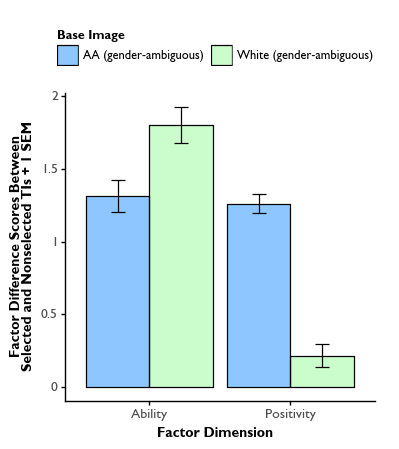

<ggplot: (107832655480)>

In [93]:
# Plot the indices for each RM-ANOVA model ... 
(ggplot(indexSummary.query("(BaseImage == 'BFBM' | BaseImage == 'WMWF') & (Index == 'Positivity' | Index == 'Ability')"), 
        aes(x='Index', y='Choice_meandiff_mean', fill='BaseImageDesc')) 
 + geom_bar(stat='identity', position=position_dodge(width=0.9), alpha=0.5, color='black') 
 + geom_errorbar(aes(ymax='Choice_sem_upper', ymin='Choice_sem_lower'), 
                 position=position_dodge(width=0.9), width=0.2, color='black') 
 + scale_fill_manual(values = ['dodgerblue', 'palegreen']) 
 + theme_classic() 
 + labs(fill='Base Image', x='Factor Dimension', y='Factor Difference Scores Between\nSelected and Nonselected TIs + 1 SEM') 
 + theme(figure_size = (4,4),
         text = element_text('Gill Sans MT'),
         axis_text_x = element_text(size=10),
         axis_title_x = element_text(size=10, weight='bold'),
         axis_text_y = element_text(size=10),
         axis_title_y = element_text(size=10, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black'),
         legend_position = 'top',
         legend_title = element_text(size=9, weight='bold'),
         legend_text = element_text(size=9)))

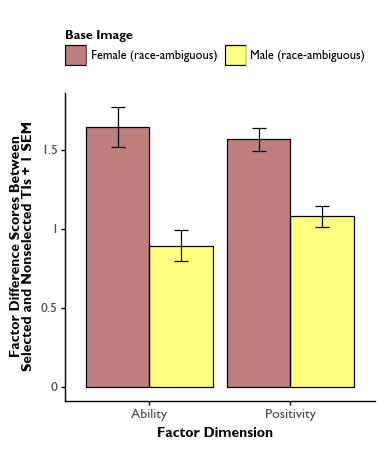

<ggplot: (107832234325)>

In [94]:
# Plot the indices for each RM-ANOVA model ... 
(ggplot(indexSummary.query("(BaseImage == 'BFWF' | BaseImage == 'WMBM') & (Index == 'Positivity' | Index == 'Ability')"), 
        aes(x='Index', y='Choice_meandiff_mean', fill='BaseImageDesc')) 
 + geom_bar(stat='identity', position=position_dodge(width=0.9), alpha=0.5, color='black') 
 + geom_errorbar(aes(ymax='Choice_sem_upper', ymin='Choice_sem_lower'), 
                 position=position_dodge(width=0.9), width=0.2, color='black') 
 + scale_fill_manual(values = ['maroon', 'yellow']) 
 + theme_classic() 
 + labs(fill='Base Image', x='Factor Dimension', y='Factor Difference Scores Between\nSelected and Nonselected TIs + 1 SEM') 
 + theme(figure_size = (4,4),
         text = element_text('Gill Sans MT'),
         axis_text_x = element_text(size=10),
         axis_title_x = element_text(size=10, weight='bold'),
         axis_text_y = element_text(size=10),
         axis_title_y = element_text(size=10, weight='bold'),
         axis_line_x = element_line(color='black'),
         axis_line_y = element_line(color='black'),
         legend_position = 'top',
         legend_title = element_text(size=9, weight='bold'),
         legend_text = element_text(size=9)))